# 1. Import Libraries.

In [1]:
!pip install -U torch sahi ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=fa73a106fb2d4272d5915251d6141bc88f8ad93e0e8c1d0671a7bbb53271ff98
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


## Check the current working directory

In [2]:
import os
os.getcwd()

'/content'

In [ ]:
# download the weight
# from sahi.utils.yolov8 import (
#     download_yolov8s_model,
# )

# 2. Import the model functions and classes from the SAHI directory.

In [17]:
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

Register the model

In [18]:
yolov8_model_path = "/content/drive/MyDrive/Colab_Notebooks/ComputerVision/ObjectDetection/YoloV8/weight/yolov8x.pt"

# 3. Standard Inference with a YOLOv8 Model
* Instantiate a detection model by defining model weight path and other parameters:

In [19]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.25,
    device="cpu", # or 'cuda:0'
)

## Inference without SAHI

In [20]:
input_path = '/content/drive/MyDrive/Colab_Notebooks/ComputerVision/ObjectDetection/YoloV8/inputImage/small-vehicles1.jpeg'

In [21]:
result = get_prediction(input_path, detection_model)

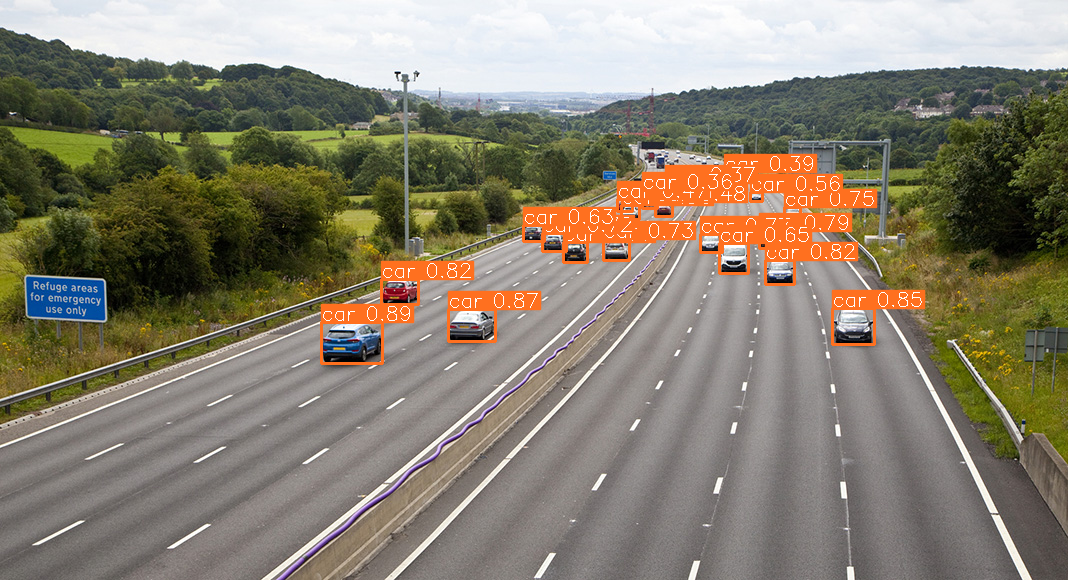

In [22]:
result.export_visuals(export_dir="/content/drive/MyDrive/Colab_Notebooks/ComputerVision/ObjectDetection/YoloV8/outputImage/")

Image("/content/drive/MyDrive/Colab_Notebooks/ComputerVision/ObjectDetection/YoloV8/outputImage/prediction_visual.png")

# SAHI with yolov8.

In [23]:
result = get_sliced_prediction(
    input_path,
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 number of slices.


In [24]:
# result.export_visuals(export_dir="/content/drive/MyDrive/Colab_Notebooks/ComputerVision/ObjectDetection/YoloV8/outputImage/")

# Image("/content/drive/MyDrive/Colab_Notebooks/ComputerVision/ObjectDetection/YoloV8/outputImage/prediction_visual.png")

In [25]:
import cv2
from numpy import asarray
from sahi.prediction import visualize_object_predictions

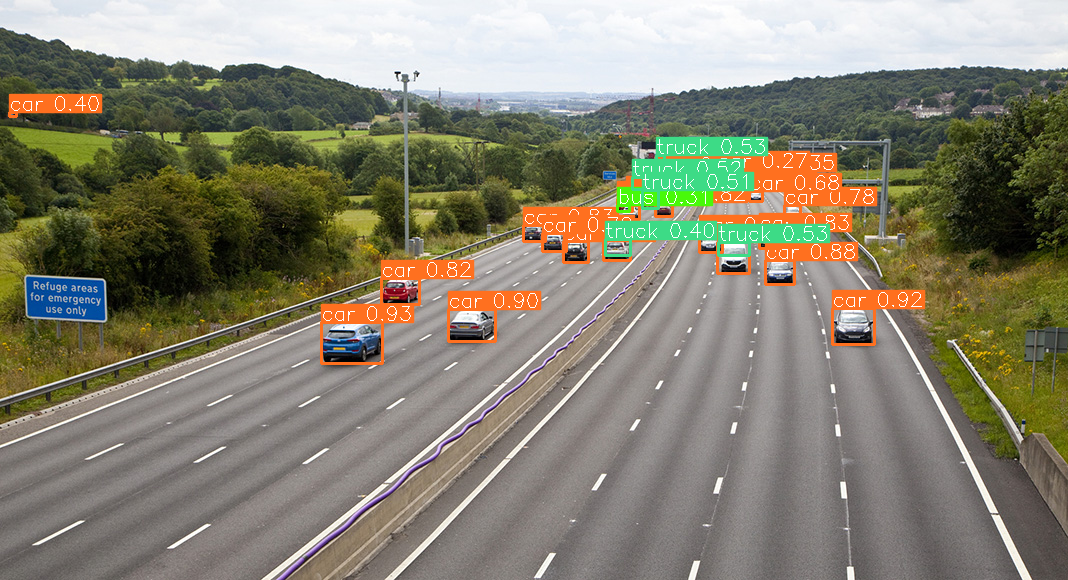

In [26]:
img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

img_converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
numpydata = asarray(img_converted)

visualize_object_predictions(
    numpydata,
    object_prediction_list = result.object_prediction_list,
    hide_labels = 0,
    output_dir='/content/drive/MyDrive/Colab_Notebooks/ComputerVision/ObjectDetection/YoloV8/outputImage',
    file_name = 'result',
    export_format = 'png'
)
Image('/content/drive/MyDrive/Colab_Notebooks/ComputerVision/ObjectDetection/YoloV8/outputImage/result.png')